# Plot Germany's yearly electricity generation by source

From https://www.energy-charts.de/energy_de.htm

In [32]:
from __future__ import print_function, division

import pandas as pd, urllib, os, json

import matplotlib.pyplot as plt

data_folder = "data"

url = "https://www.energy-charts.de/energy/year.json"

%matplotlib inline

In [33]:
file_name = os.path.join(data_folder,url[url.rfind("/")+1:])
if not os.path.isfile(file_name):
    print("Downloading",file_name)
    urllib.urlretrieve (url, file_name)

In [34]:
with open(file_name) as data_file:    
    data = json.load(data_file)

In [35]:
data

[{u'color': u'rgb(125,25,125)',
  u'datasource': u'50 Hertz, Amprion, Tennet, TransnetBW, EEX',
  u'date': [1459872896000],
  u'disabled': u'true',
  u'key': [{u'de': u'Import Saldo',
    u'en': u'Import Balance',
    u'fr': u'Solde du Importation',
    u'it': u'Saldo del Importazione'}],
  u'stacked': u'true',
  u'values': [[2002, 6.628],
   [2003, -3.27],
   [2004, -2.621],
   [2005, -4.565],
   [2006, -16.977],
   [2007, -16.555],
   [2008, -20.099],
   [2009, -12.273],
   [2010, -14.955],
   [2011, -3.766],
   [2012, -20.541],
   [2013, -32.194],
   [2014, -33.887],
   [2015, -48.27],
   [2016, -16.256]],
  u'xAxisFormat': u'integer'},
 {u'color': u'rgb(0,0,200)',
  u'key': [{u'de': u'Wasserkraft',
    u'en': u'Hydro Power',
    u'fr': u'Hydro\xe9lectrique',
    u'it': u'Idroelettrica'}],
  u'values': [[2002, 23.124],
   [2003, 17.722],
   [2004, 20.095],
   [2005, 19.638],
   [2006, 20.008],
   [2007, 21.17],
   [2008, 20.443],
   [2009, 19.031],
   [2010, 20.953],
   [2011, 17.67

In [44]:
years = range(2002,2017)
df = pd.DataFrame(data=[[d["values"][i][1] for d in data] for i in range(len(years))],
                  columns=[d["key"][0]["en"] for d in data],
                  index=years)

df.rename(columns={"Import Balance" : "Imports",
           "Hydro Power" : "Hydro",
           "Uranium" : "Nuclear"},inplace=True)
df.describe()

Imports      Hydro    Biomass     Nuclear  Brown Coal   Hard Coal  \
count  15.000000  15.000000  15.000000   15.000000   15.000000   15.000000   
mean  -15.973400  19.013333  24.941067  120.677333  131.287333  103.411667   
std    14.169315   4.931654  15.182815   38.278854   26.726580   21.754019   
min   -48.270000   2.111000   4.079000   24.003000   35.920000   30.924000   
25%   -20.320000  19.220500  12.078500   93.153500  134.277000  101.812000   
50%   -16.256000  20.008000  23.121000  132.971000  138.565000  107.734000   
75%    -4.165500  21.061500  38.735000  155.449500  141.258500  114.721500   
max     6.628000  23.124000  46.014000  158.711000  145.122000  121.831000   

             Gas       Wind      Solar  
count  15.000000  15.000000  15.000000  
mean   46.741933  39.765867  12.336133  
std    15.016153  17.627413  13.731792  
min     9.724000  15.786000   0.162000  
25%    39.783500  27.495500   1.751000  
50%    49.868000  38.648000   5.074000  
75%    56.928000  49.776500  22.989500  
max    66.937000  85.433000  36.582000

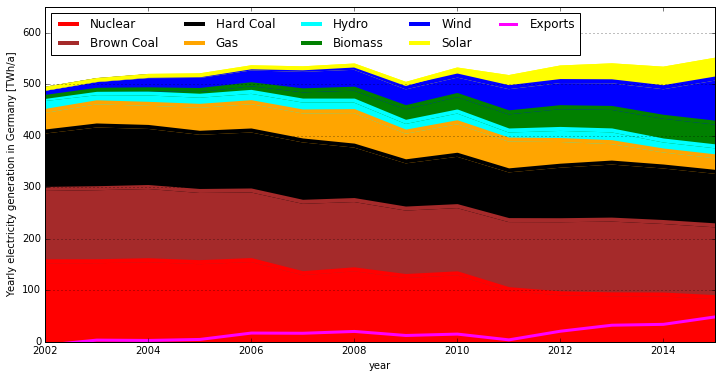

In [67]:
fig,ax = plt.subplots(1,1)

fig.set_size_inches(12,6)


colors = {"Brown Coal" : "brown",
          "Hard Coal" : "k",
          "Nuclear" : "r",
          "Hydro" : "cyan",
          "Wind" : "blue",
          "Solar" : "yellow",
          "Biomass" : "green",
          "Waste" : "orange",
          "Gas" : "orange"}
#reorder
cols = ["Nuclear","Brown Coal","Hard Coal","Gas","Hydro","Biomass","Wind","Solar"]

df.drop(2016)[cols].plot(kind="area",
                         ax=ax,
                         colors=[colors[col] for col in cols],
                         linewidth=4)

ax.set_ylabel("Yearly electricity generation in Germany [TWh/a]")

ax.set_xlabel("year")

ax.set_ylim([0,650])

(-df["Imports"].drop(2016)).plot(ax=ax,color="magenta",label="Exports",linewidth=3)

ax.legend(loc="upper left",ncol=5)

ax.yaxis.grid(True)

In [64]:
fig.tight_layout()
fig.savefig("germany_yearly_electricity.pdf")